In [2]:
import folium
import geopandas
import matplotlib
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [3]:
import pandas as pd

In [20]:
londrina = geopandas.read_file('126/LIM_Bairros_V1.shp')
#londrina = geopandas.read_file('Londrina/base_londrina.shp')

lojas = pd.read_csv('coordenadas.csv')
lista = []
listaRemove = []
for index, loja in lojas.iterrows():
    if loja['Longitude'] == 0.00000 or loja['Longitude'] < -51.35:
        listaRemove.append(loja)
        #print(index)
        continue
    lista.append(Point(loja['Longitude'],loja['Latitude']))
#lojas['geometry'] = lista

In [21]:
londrina.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   bairros   55 non-null     object  
 1   area_m2   55 non-null     float64 
 2   regiao    55 non-null     object  
 3   geometry  55 non-null     geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 1.8+ KB


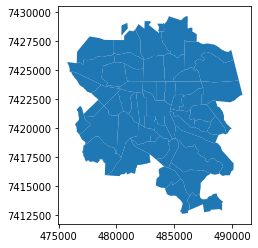

In [22]:
londrina.plot()

In [146]:
listaRemove[0].Nome
for item in listaRemove:
    lojas = lojas[lojas.Nome != item.Nome]

In [158]:
type(londrina)

geopandas.geodataframe.GeoDataFrame

In [148]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


In [149]:
for i in range(0,len(londrina['geometry'])):
    for j in range(0,len(lista)):
        check = londrina['geometry'][i].contains(lista[j])
        if check:
            print('Tem')
                                                 

In [15]:
londrina.crs

{'init': 'epsg:31982'}

In [23]:
london = londrina.to_crs(epsg=3857)

london

/home/renan/anaconda3/envs/py3/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,bairros,area_m2,regiao,geometry
0,Perobinha,4873017.43,NORTE,"POLYGON ((-5699946.028 -2665051.157, -5699976...."
1,Heimtal,289590.81,NORTE,"POLYGON ((-5694588.077 -2662521.873, -5694585...."
2,Parigot de Souza,4156123.20,NORTE,"POLYGON ((-5696819.229 -2663611.436, -5696820...."
3,Vivi Xavier,5510368.41,NORTE,"POLYGON ((-5694406.228 -2664248.341, -5694365...."
4,Cinco Conjuntos,6809195.63,NORTE,"POLYGON ((-5691854.181 -2662806.732, -5691811...."
5,Cilo 3,5375366.72,OESTE,"POLYGON ((-5700382.562 -2666469.981, -5700470...."
6,Cilo 2,1990552.25,OESTE,"POLYGON ((-5701275.775 -2667402.011, -5700498...."
7,Cidade Industrial 1,5461977.90,NORTE,"POLYGON ((-5688773.652 -2664656.739, -5688752...."
8,Alpes,3758580.99,NORTE,"POLYGON ((-5694561.961 -2666192.952, -5694562...."
9,Pacaembú,3363450.02,NORTE,"POLYGON ((-5692998.347 -2666561.959, -5693026...."


In [36]:
lojas.drop(lojas.index[5])

,Unnamed: 0,Classificação,Latitude,Longitude,Nome
0,0,(26),-23.299955,-51.184416,Espaço Smart
1,1,(235),-23.353330,-51.137791,Depósito Roseira - Construção e Acabamentos
2,2,(317),-23.301205,-51.169041,Depósito São Marcos
3,3,(150),-23.258204,-51.144291,Depósito Alvorada - Materiais de Construção
4,4,(12),-23.344830,-51.188916,Gol Materiais Para Construção
...,...,...,...,...,...
201,201,(11),-23.279955,-51.172666,Madeireira Casa Verde
202,202,(11),0.000000,0.000000,Madeireira Casa Verde
203,203,(3),-23.345080,-51.166666,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re..."
204,204,(3),0.000000,0.000000,"BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re..."


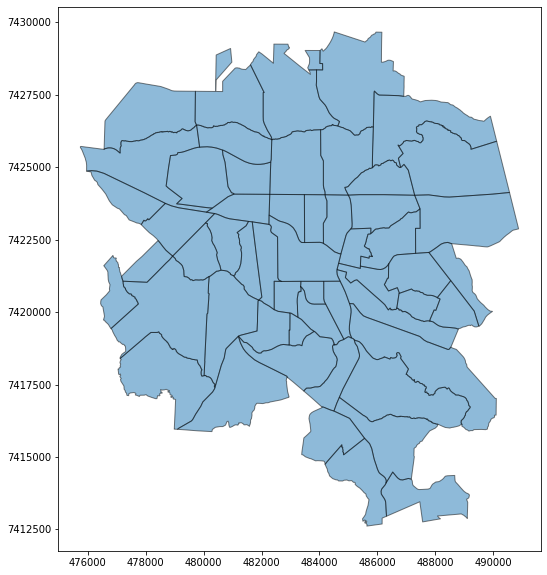

In [9]:
ax = londrina.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [80]:
len(lista)

187

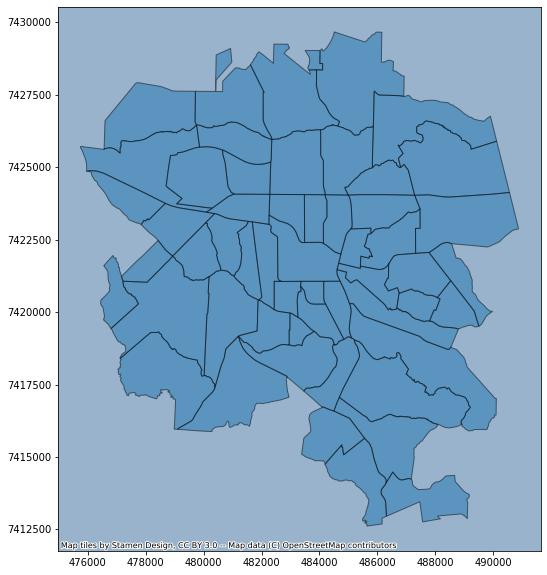

In [155]:
ax = londrina.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

/home/renan/anaconda3/envs/py3/lib/python3.8/site-packages/contextily/tile.py:629: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


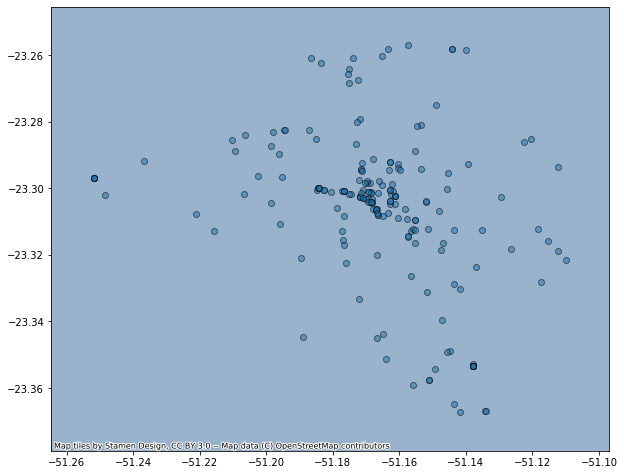

In [156]:
lista2 = geopandas.GeoSeries(lista)
ax = lista2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

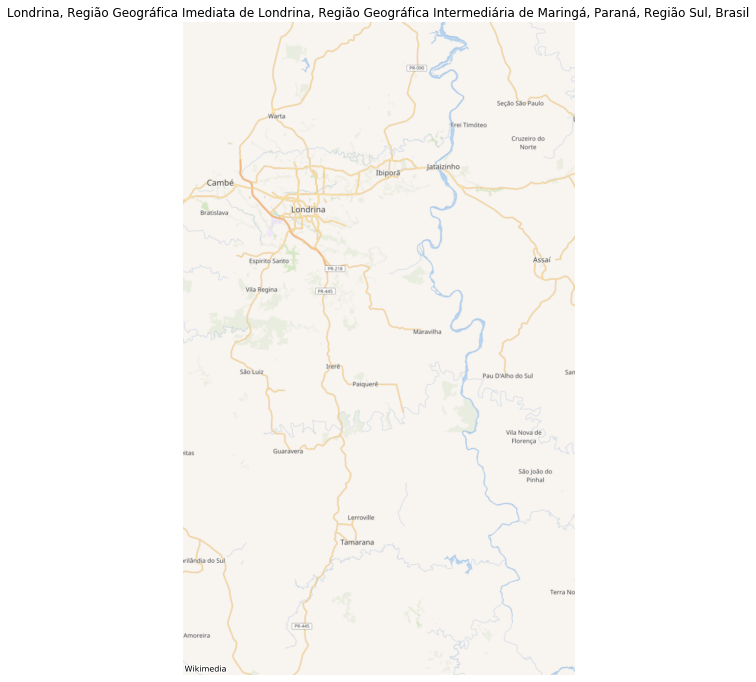

In [125]:
sao_paulo = ctx.Place("Londrina", source=ctx.providers.Wikimedia)
sao_paulo.plot()